# Infant Mortality Prediction

In [1]:
import pandas as pd
import numpy as np

%config InlineBackend.figure_formats = ['svg']

import matplotlib.pyplot as plt
%matplotlib inline

from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree

from scipy.spatial.distance import pdist
from sklearn.manifold.t_sne import _joint_probabilities
from scipy import linalg
from sklearn.metrics import pairwise_distances
from scipy.spatial.distance import squareform


import seaborn as sns
sns.set(rc={'figure.figsize':(11.7,8.27)})
palette = sns.color_palette("bright", 10)


C:\Users\joeba\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:143: FutureWarning: The sklearn.manifold.t_sne module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.manifold. Anything that cannot be imported from sklearn.manifold is now part of the private API.
  warnings.warn(message, FutureWarning)


In [2]:
df = pd.read_csv('C:/Users/joeba/OneDrive/Documents/ML/icu mortality prediction/complete.csv', low_memory=False)
df.shape

(3999, 43)

In [3]:
df = df.drop(['RecordID'], axis=1)

In [4]:
df.head()

,ALP,ALT,AST,Age,Albumin,BUN,Bilirubin,Cholesterol,Creatinine,DiasABP,...,SaO2,SysABP,Temp,TroponinI,TroponinT,Urine,WBC,Weight,pH,In-hospital_death
0,77.0,31.0,46.0,54,2.973333,10.500000,0.7,154.0,0.750000,58.795833,...,97.250000,116.891892,37.357143,2.1,0.14,171.052632,10.300000,80.060976,7.387273,0
1,77.0,31.0,46.0,76,2.973333,18.333333,0.7,154.0,1.100000,58.897059,...,96.833333,113.411765,36.939130,2.1,0.14,151.560976,11.266667,80.670588,7.395000,0
2,116.0,83.0,199.5,44,2.500000,4.666667,2.9,154.0,0.333333,67.125000,...,95.000000,125.687500,37.800000,2.1,0.14,124.951220,4.700000,56.700000,7.495000,0
3,105.0,12.0,15.0,68,4.400000,17.666667,0.2,154.0,0.766667,58.795833,...,97.250000,116.891892,36.223077,2.1,0.14,545.833333,9.400000,84.600000,7.387273,0
4,77.0,31.0,46.0,88,3.300000,35.000000,0.7,154.0,1.000000,58.795833,...,97.250000,116.891892,36.880000,2.1,0.14,62.131579,4.300000,80.060976,7.387273,0


In [26]:
df.columns

Index(['ALP', 'ALT', 'AST', 'Age', 'Albumin', 'BUN', 'Bilirubin',
       'Cholesterol', 'Creatinine', 'DiasABP', 'FiO2', 'GCS', 'Gender',
       'Glucose', 'HCO3', 'HCT', 'HR', 'Height', 'ICUType', 'K', 'Lactate',
       'MAP', 'MechVent', 'Mg', 'NIDiasABP', 'NIMAP', 'NISysABP', 'Na',
       'PaCO2', 'PaO2', 'Platelets', 'RespRate', 'SaO2', 'SysABP', 'Temp',
       'TroponinI', 'TroponinT', 'Urine', 'WBC', 'Weight', 'pH',
       'In-hospital_death'],
      dtype='object')

In [5]:
df['In-hospital_death'].value_counts()

0    3445
1     554
Name: In-hospital_death, dtype: int64

In [37]:
cm = df.corr()
cm = cm[['In-hospital_death']]
cm

,In-hospital_death
ALP,0.115577
ALT,0.070992
AST,0.108484
Age,0.130701
Albumin,-0.126925
BUN,0.223369
Bilirubin,0.174017
Cholesterol,-0.008578
Creatinine,0.117615
DiasABP,-0.050506


In [43]:
cm.fillna(0, inplace=True)

In [57]:
cm.values.flatten()

array([ 0.11557721,  0.0709919 ,  0.10848383,  0.13070084, -0.12692505,
        0.22336905,  0.17401743, -0.00857786,  0.11761451, -0.05050565,
       -0.01098632, -0.25410416, -0.00634564,  0.10576441, -0.12957416,
       -0.00958441,  0.07356145, -0.01245618, -0.00631393,  0.01871285,
        0.12418386, -0.02201005,  0.        ,  0.06176641, -0.0804544 ,
       -0.07899451, -0.05286573,  0.02197948, -0.07554988, -0.00807029,
       -0.02017767,  0.0317184 , -0.05652999, -0.04768752, -0.05951873,
        0.05313294,  0.03486592, -0.12088092,  0.09493625, -0.0544425 ,
        0.0249607 ,  1.        ])

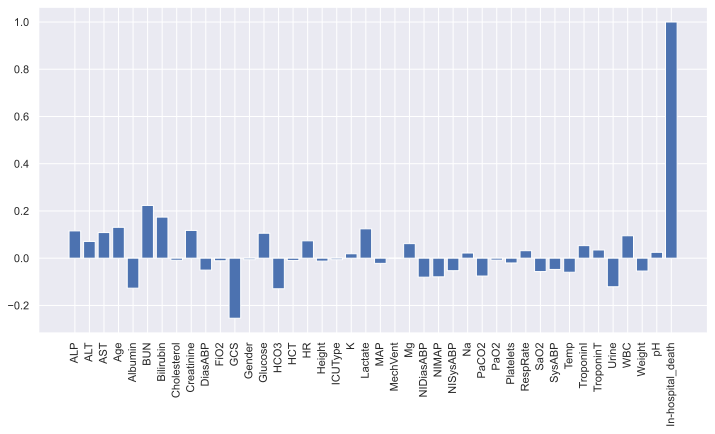

In [63]:
plt.figure(figsize=(12,6))
plt.bar(cm.index, cm.values.flatten())
plt.xticks(rotation=90)
plt.show()

In [27]:
X = df.iloc[:,0:-1]
y = df.loc[:,'In-hospital_death']

In [28]:
X

,ALP,ALT,AST,Age,Albumin,BUN,Bilirubin,Cholesterol,Creatinine,DiasABP,...,RespRate,SaO2,SysABP,Temp,TroponinI,TroponinT,Urine,WBC,Weight,pH
0,77.0,31.00,46.000000,54,2.973333,10.500000,0.700000,154.0,0.750000,58.795833,...,17.428571,97.250000,116.891892,37.357143,2.1,0.140,171.052632,10.300000,80.060976,7.387273
1,77.0,31.00,46.000000,76,2.973333,18.333333,0.700000,154.0,1.100000,58.897059,...,19.000000,96.833333,113.411765,36.939130,2.1,0.140,151.560976,11.266667,80.670588,7.395000
2,116.0,83.00,199.500000,44,2.500000,4.666667,2.900000,154.0,0.333333,67.125000,...,19.000000,95.000000,125.687500,37.800000,2.1,0.140,124.951220,4.700000,56.700000,7.495000
3,105.0,12.00,15.000000,68,4.400000,17.666667,0.200000,154.0,0.766667,58.795833,...,15.457627,97.250000,116.891892,36.223077,2.1,0.140,545.833333,9.400000,84.600000,7.387273
4,77.0,31.00,46.000000,88,3.300000,35.000000,0.700000,154.0,1.000000,58.795833,...,19.166667,97.250000,116.891892,36.880000,2.1,0.140,62.131579,4.300000,80.060976,7.387273
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3994,82.0,32.25,49.000000,70,3.000000,16.000000,0.700000,145.0,0.900000,68.865385,...,19.290323,97.230769,117.230769,37.004762,2.2,0.125,50.769231,14.500000,87.000000,7.381429
3995,82.0,32.25,49.000000,25,3.000000,4.400000,0.700000,117.0,0.840000,58.754774,...,17.636364,97.230769,117.820733,36.580000,2.2,0.125,584.375000,4.733333,166.400000,7.385000
3996,51.0,20.00,20.000000,44,3.000000,7.750000,0.500000,145.0,1.125000,74.166667,...,19.290323,97.230769,125.666667,37.792308,2.2,0.125,116.472222,11.066667,109.000000,7.396667
3997,169.0,1971.00,1685.333333,37,3.100000,89.250000,0.733333,145.0,9.650000,92.923077,...,19.290323,97.230769,166.615385,38.418182,2.2,0.125,11.230769,13.025000,87.400000,7.416000


In [29]:
y

0       0
1       0
2       0
3       0
4       0
       ..
3994    0
3995    0
3996    0
3997    1
3998    0
Name: In-hospital_death, Length: 3999, dtype: int64

t-SNE done! Time elapsed: 9.561320543289185 seconds


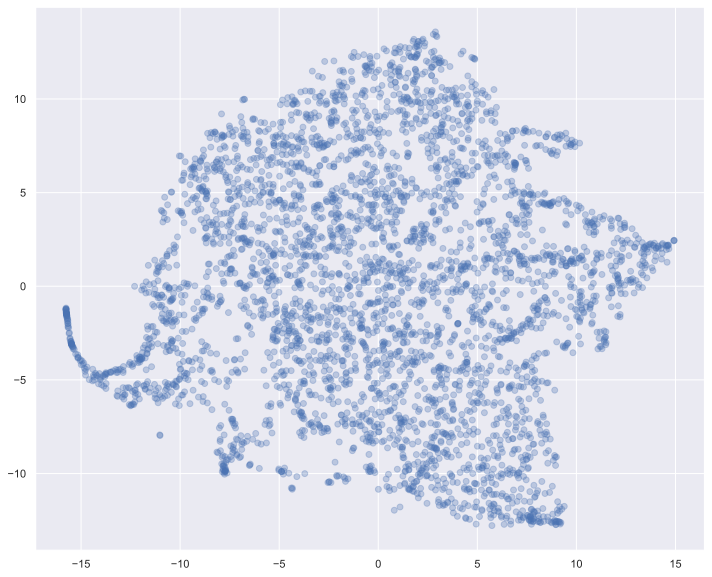

In [42]:
from sklearn.manifold import TSNE
import time

time_start = time.time()
tsne = TSNE(n_components=2, verbose=0, perplexity=40, n_iter=300)
tsne_results = tsne.fit_transform(X)
print('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))

df_subset = pd.DataFrame()
df_subset['tsne-2d-one'] = tsne_results[:,0]
df_subset['tsne-2d-two'] = tsne_results[:,1]

plt.figure(figsize=(12,10))
colours = np.random.rand(21)
sX = df_subset['tsne-2d-one']
sY = df_subset['tsne-2d-two']
plt.scatter(x=sX, y=sY, alpha=0.3)
plt.show()

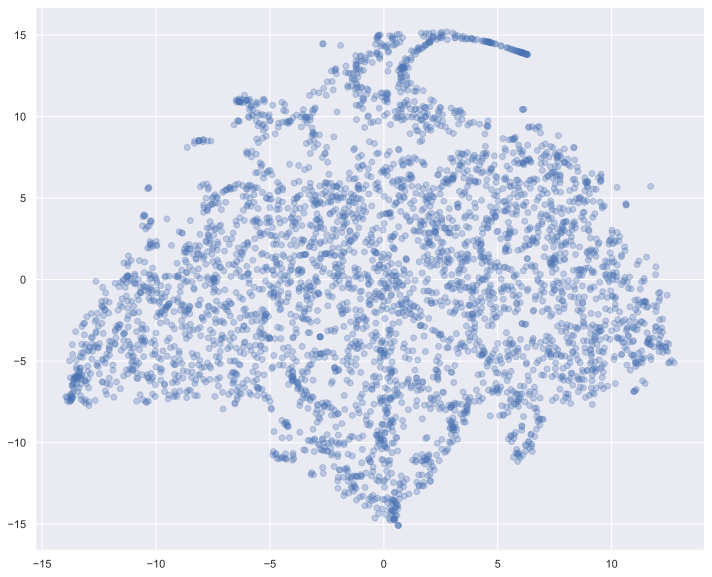

In [41]:
from sklearn.manifold import TSNE
import time

time_start = time.time()
tsne = TSNE(n_components=3, verbose=0, perplexity=40, n_iter=300)
tsne_results = tsne.fit_transform(X)
print('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))

df_subset = pd.DataFrame()
df_subset['tsne-2d-one'] = tsne_results[:,0]
df_subset['tsne-2d-two'] = tsne_results[:,1]
df_subset['tsne-2d-three'] = tsne_results[:,2]

plt.figure(figsize=(12,10))
colours = np.random.rand(21)
sX = df_subset['tsne-2d-one']
sY = df_subset['tsne-2d-two']
sZ = df_subset['tsne-2d-three']
plt.scatter(x=sX, y=sY, alpha=0.3)
plt.show()

In [ ]:

dtree = DecisionTreeClassifier(min_samples_leaf=5)

In [ ]:
X = df.iloc[:,:-2].values
y = df.iloc[:,-1].values

In [ ]:
dtree.fit(X,y)

In [ ]:
dtree.score(X,y)

In [ ]:
tree.plot_tree(dtree)
plt.show()